In [1]:
# change working directory to the '/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/'
import os
os.chdir('/Users/lambertenghi/Documents/GitHub/PerturbationDrive')
os.getcwd()

'/Users/lambertenghi/Documents/GitHub/PerturbationDrive'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


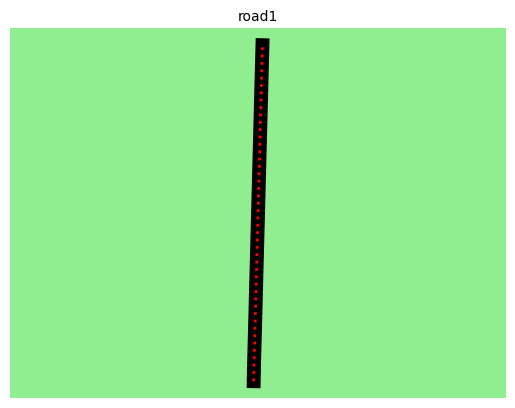

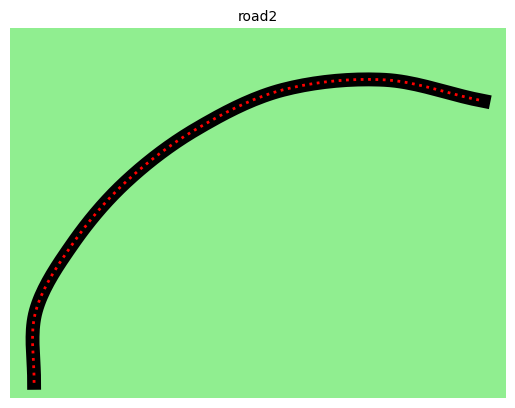

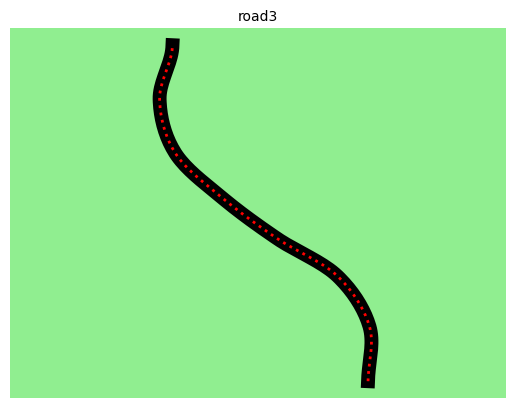

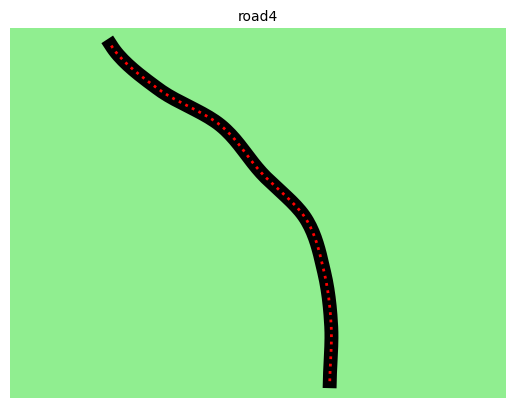

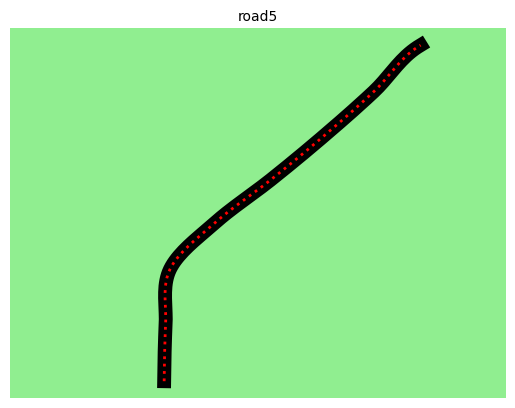

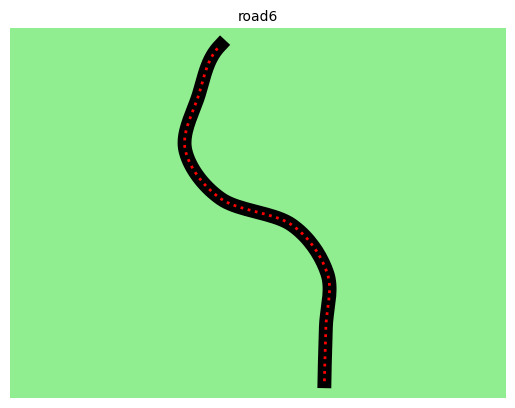

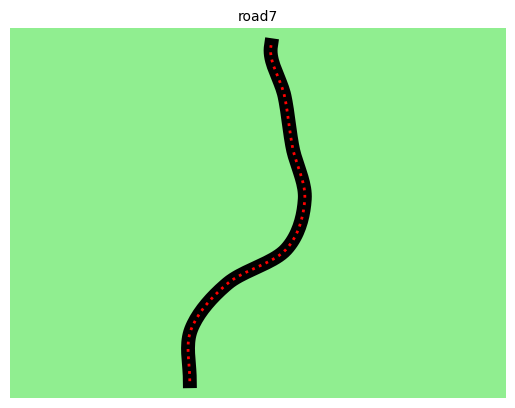

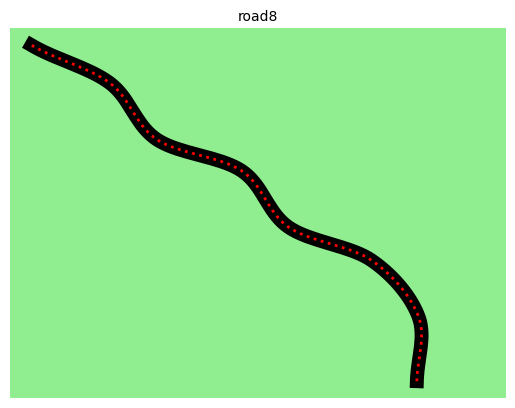

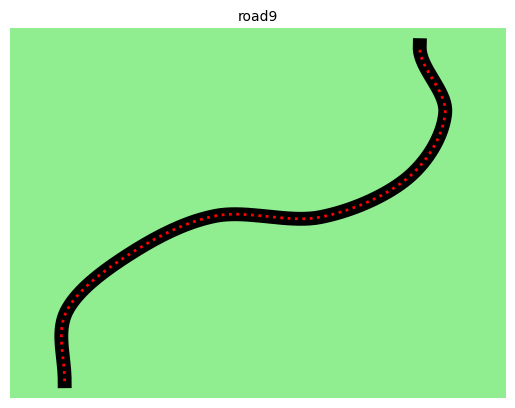

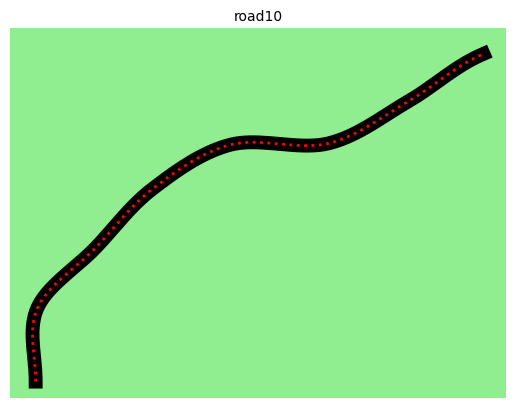

In [2]:
from perturbationdrive import CustomRoadGenerator
from perturbationdrive.RoadGenerator.Roads.road_visualizer import visualize_road

# road 1 is straight
road1_angles = [0, 0, 0, 0, 0, 0, 0, 0]
road1_segments = [25, 25, 25, 25, 25, 25, 25, 25]

# road 2-10 are a set of rooads with different smoothnes and turns
road2_angles = [0, -20, -10, -11, -13, -25, -24, 4]
road2_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road3_angles = [0, 24, 24, -5, -7, -24, -20, 17]
road3_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road4_angles = [0, 6, 8, 20, -3, 20, -13, -27]
road4_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road5_angles = [0, -2, -30, -8, 2, 2, 4, -30]
road5_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road6_angles = [0, 0, 27, 35, -35, -35, -6, -35]
road6_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road7_angles = [0, -27, -20, 35, 23, -3, 4, -35]
road7_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road8_angles = [0, 30, 30, -30, 32, -32, 25, -12]
road8_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road9_angles = [0, -35, -20, -35, 35, 35, 35, -35]
road9_segments = [25, 25, 25, 25, 25, 25, 25, 25]

road10_angles = [0, -35, 0, -17, -35, 35, 6, -22]
road10_segments = [25, 25, 25, 25, 25, 25, 25, 25]


angles = [
    road1_angles,
    road2_angles,
    road3_angles,
    road4_angles,
    road5_angles,
    road6_angles,
    road7_angles,
    road8_angles,
    road9_angles,
    road10_angles,
]
segments = [
    road1_segments,
    road2_segments,
    road3_segments,
    road4_segments,
    road5_segments,
    road6_segments,
    road7_segments,
    road8_segments,
    road9_segments,
    road10_segments,
]

road_gen = CustomRoadGenerator()

# generate the roads and visualize them
roads = []
road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road1_angles, seg_length=road1_segments
)
road1 = road_gen.previous_road
visualize_road(road1, "road1")
roads.append(road1)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road2_angles, seg_length=road2_segments
)
road2 = road_gen.previous_road
visualize_road(road2, "road2")
roads.append(road_string)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road3_angles, seg_length=road3_segments
)
road3 = road_gen.previous_road
visualize_road(road3, "road3")
roads.append(road3)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road4_angles, seg_length=road4_segments
)
road4 = road_gen.previous_road
visualize_road(road4, "road4")
roads.append(road4)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road5_angles, seg_length=road5_segments
)
road5 = road_gen.previous_road
visualize_road(road5, "road5")
roads.append(road5)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road6_angles, seg_length=road6_segments
)
road6 = road_gen.previous_road
visualize_road(road6, "road6")
roads.append(road6)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road7_angles, seg_length=road7_segments
)
road7 = road_gen.previous_road
visualize_road(road7, "road7")
roads.append(road7)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road8_angles, seg_length=road8_segments
)
road8 = road_gen.previous_road
visualize_road(road8, "road8")
roads.append(road8)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road9_angles, seg_length=road9_segments
)
road9 = road_gen.previous_road
visualize_road(road9, "road9")
roads.append(road9)

road_string = road_gen.generate(
    starting_pos=(0, 0, 0, 4), angles=road10_angles, seg_length=road10_segments
)
road10 = road_gen.previous_road
visualize_road(road10, "road10")
roads.append(road10)

In [10]:
# setup a sdsandbox simulator
from examples.self_driving_sandbox_donkey.sdsandbox_simulator import SDSandboxSimulator

simulator_sdsandbox = SDSandboxSimulator(
    simulator_exe_path="./examples/self_driving_sandbox_donkey/sim/donkey-sim.app",
    host="127.0.0.1",
    port=9091,
    show_image_cb=True,
)

In [11]:
from perturbationdrive import PerturbationDrive
from examples.models.dave2_agent import Dave2Agent
from examples.models.epoch_agent import EpochAgent
from examples.models.chauffeur_agent import ChauffeurAgent

dave2 = Dave2Agent()
dave2.name = "Vanilla-DAVE2"
dave_aug = Dave2Agent(model_path="./examples/models/checkpoints/dave_90k_v1.h5")
# dave_aug.name = "FILTER-AUG-DAVE2"
# epoch = EpochAgent(model_path="./examples/models/checkpoints/epoch_90k_v2.h5")
# epoch.name = "EPOCH"
# chauffeur = ChauffeurAgent(model_path="./examples/models/chauffeur_90k_v2.h5")
# agents = [dave2, dave_aug, epoch]
agents=[dave2]
# chauffeur = ChauffeurAgent(model_path="./examples/models/chauffeur_90k_v1.h5")

Using model: ./examples/models/checkpoints/dave_90k_v1.h5
Using model: ./examples/models/checkpoints/dave_90k_v1.h5


In [12]:
from perturbationdrive import Scenario

try:
    benchmark = PerturbationDrive(simulator=simulator_sdsandbox, ads=dave2)
    benchmark.simulator.connect()
    starting_pos = benchmark.simulator.initial_pos

    # init all scenarios
    scenarios = []
    counter = 0
    # iterate over all agents
    for agent in agents:
        for angle, segment in zip(angles, segments):
            # run all perturbations for each road
            waypoints = road_gen.generate(
                starting_pos=starting_pos, angles=angle, seg_length=segment
            )
            scenarios = []
            for func in [""]:
                scenarios.append(
                    Scenario(
                        waypoints=waypoints,
                        perturbation_function=func,
                        perturbation_scale=0,
                    )
                )
            benchmark.setADS(agent)
            print(f"Starting Agent {agent.name} on road {angle}")
            # run the benchmark
            res = benchmark.simulate_scenarios(
                scenarios=scenarios,
                log_dir=f"./logs/donkey_benchmark_baseline_perturbations_road{counter}_{agent.name}.json",
            )
            counter += 1
            print(f"Finished Agent {agent.name} on road {angle}")
except Exception as e:
    print(e)
finally:
    benchmark.simulator.tear_down()

INFO:DonkeyProcess:This is the launch string /Users/lambertenghi/Documents/GitHub/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator
[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-buck

2024-07-24 11:52:31.864 Python[21836:1537704] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/c_/y8w1xknx0636psltcpf92v21jbs3h7/T/org.python.python.savedState


INFO:SDSandBoxSimulator:Waiting for inital obs
INFO:SDSandBoxSimulator:Waiting for inital obs
INFO:SDSandBoxSimulator:Waiting for inital obs
INFO:SDSandBoxSimulator:Waiting for inital obs
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
INFO:SDSandBoxSimulator:Waiting for inital obs
Starting Agent Vanilla-DAVE2 on road [0, 0, 0, 0, 0, 0, 0, 0]
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-07-24 11:52:34.454 Python[21836:1537704] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


fps 18.93
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done
SDSandBox: Finished scenario
fps 19.68
+++++ Warning Scenario Writer: The log file path already exists +++++
Finished Agent Vanilla-DAVE2 on road [0, 0, 0, 0, 0, 0, 0, 0]
Starting Agent Vanilla-DAVE2 on road [0, -20, -10, -11, -13, -25, -24, 4]
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done
SDSandBox: Finished scenario
+++++ Warning Scenario Writer: The log file path already exists +++++
Finished Agent Vanilla-DAVE2 on road [0, -20, -10, -11, -13, -25, -24, 4]
Starting Agent Vanilla-DAVE2 on road [0, 24, 24, -5, -7, -24, -20, 17]
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario
fps 19.69
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.73
fps 19.74
fps 19.70
INFO:SDSandBoxSimulat

: 

In [ ]:
import json

def combine_json_files(file_list, output_file_name):
    combined_data = []
    
    # Read each JSON file and append its data to the combined_data list
    for file in file_list:
        with open(file, 'r') as f:
            data = json.load(f)
            combined_data.extend(data)
    
    # Write the combined_data list to the output JSON file
    with open(output_file_name, 'w') as f:
        json.dump(combined_data, f)
    
# move the results to a new folder
import shutil
shutil.move('./logs', './results')